<div style="background-color:lavender; color:#black; text-align:center; padding:2%">
    
**Комментарий студента:** Эльвира, привет! Приятно познакомиться! Постараюсь учесть все советы и исправить ошибки, спасибо за проверку)

# Исследование интернет-магазина

## Введение

В данной работе предстоит исследовать список гипотез, а также результаты A/B теста для крупного интернет-магазина с целью увеличения выручки.

Необходимо:

- провести приоритизация гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence и Effort с помощью фреймворков ICE и RICE;
- по результатам A/B теста рассчитать агрегированные кумулятивные данные о заказах и о посетителях интернет-магазина, на основе расчётов построить кумулятивные графики;
- провести работу по установлению границ аномальных значений для стоимости заказа и количества заказов пользователя;
- провести расчёты статистической значимости по двум метрикам: различия по среднему количеству заказов и различия по среднему чеку между группами, как по "сырым", так и по "очищенным" данным.


Опишем данные, с которыми предстоит работа:

1. Таблица с гипотезами:
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
2. Данные c заказами по итогам проведения A/B теста:
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

3. Данные с посетителями интернет-магазина по итогам проведения A/B теста:
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

### Загрузка данных и их подготовка к анализу

In [7]:
# импортируем необходимые библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.simplefilter("ignore")

In [8]:
# считываем необходимые данные в датафреймы

hypothesis = pd.read_csv('C:/Users/Кристина/Desktop/Шпаргалки/Проекты/hypothesis.csv')
orders = pd.read_csv('C:/Users/Кристина/Desktop/Шпаргалки/Проекты/orders.csv')
visitors = pd.read_csv('C:/Users/Кристина/Desktop/Шпаргалки/Проекты/visitors.csv')

In [9]:
# создадим функцию для первичной обработки данных (вывод общей информации)

def research(data):
    display(data.head(10))                                       # вывод первых строк датафрейма
    print('*' * 50)                                              # разделитель
    data.info()                                                  # вывод общей информации о датафрейме
    print('*' * 50, '\n\033[1m Количество полных дублей: \033[0m', 
            data.duplicated().sum())                             # проверка на полные дубликаты
    print('*' * 50)
    display(data.describe())                                     # описание распределения численных значений
    print('*' * 50)
    
    for x in data.columns:
        display(data[x].value_counts().to_frame())               # распределение значений в каждом столбце

Далее исследуем исходные таблицы с данными.

#### Подготовка к анализу датафрейма `hypothesis`

In [12]:
pd.set_option('display.max_colwidth', None)
research(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes
************************************************** 
 Количество полных дублей:  0
**************************************************


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


**************************************************


,count
Hypothesis,
"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",1
"Запустить собственную службу доставки, что сократит срок доставки заказов",1
"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",1
"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1
"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1
"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1
"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",1
"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",1
"Запустить акцию, дающую скидку на товар в день рождения",1


,count
Reach,
3,3
8,2
2,1
5,1
10,1
1,1


,count
Impact,
3,3
10,1
5,1
1,1
2,1
7,1
9,1


,count
Confidence,
8,3
4,1
7,1
3,1
1,1
2,1
9,1


,count
Efforts,
3,3
5,2
6,1
10,1
8,1
1,1


Таблица с гипотезами имеет 9 строк - гипотез с оценками параметров `Reach, Impact, Confidence, Effort` по 10-балльной шкале. Дубликатов и пропусков нет, типы данных заданы корректно. Однако названия столбцов лучше перевести в нижний регистр:

In [14]:
hypothesis.columns = hypothesis.columns.str.lower() # приводим название всех столбцов датафрейма к нижнему регистру
hypothesis.columns                                  # проверка

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Далее исследуем таблицу с заказами.

#### Подготовка к анализу датафрейма `orders`

In [17]:
research(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
************************************************** 
 Количество полных дублей:  0
**************************************************


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


**************************************************


,count
transactionId,
3667963787,1
4167421281,1
2875229767,1
504373597,1
2017680897,1
...,...
1853288890,1
2084190534,1
2956594374,1


,count
visitorId,
4256040402,11
2458001652,11
2378935119,9
2038680547,8
199603092,5
...,...
2524310328,1
2210805728,1
2274825520,1


,count
date,
2019-08-05,48
2019-08-14,47
2019-08-12,47
2019-08-06,46
2019-08-15,46
2019-08-01,45
2019-08-28,45
2019-08-02,44
2019-08-27,44


,count
revenue,
990,17
390,13
890,13
400,10
1490,10
...,...
70,1
3080,1
19240,1


,count
group,
B,640
A,557


Таблица с заказами также не имеет пропусков и дубликатов, однако необходимо привести названия столбцов `transactionId, visitorId` к корректному оформлению. Помимо этого нужно изменить тип данных в столбце `date` на тип даты. 

In [19]:
orders = orders.rename(columns = {'transactionId':'transaction_id', 'visitorId':'visitor_id'}) # меняем наименование столбцов

In [20]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')  # меняем тип данных на дату

In [21]:
orders.info() # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Типы корректно исправлены.

Помимо этого данный датафрейм нужно проверить на корректное разбиение пользователей по группам. Проверим нет ли такого, что один пользователь относится к двум группам одновременно:

In [24]:
(
    orders.groupby('visitor_id')
    .agg({'group':'nunique'})
    .reset_index()
    .query('group>1')
    .count()
)

visitor_id    58
group         58
dtype: int64

Таким образом целых 58 пользователей относится к двум группам одновременно. Стоит обратить внимание, что из-за этого возможны так же ошибки в распределении групп по посетителям в датафрейме `visitors`.

Удалим пользователей с меткой двух групп из нашей таблицы с заказами, однако следует помнить о такой манипуляции и относится к результатам теста в дальнейшем осторожно:

In [26]:
filter_visitors = (
    orders.groupby('visitor_id')
    .agg({'group':'nunique'})
    .reset_index()
    .query('group>1')['visitor_id']
)

orders = orders.query('visitor_id not in @filter_visitors')

In [27]:
# проверка
(
    orders.groupby('visitor_id')
    .agg({'group':'nunique'})
    .reset_index()
    .query('group>1')
    .count()
)

visitor_id    0
group         0
dtype: int64

#### Подготовка к анализу датафрейма `visitors`

In [29]:
research(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
************************************************** 
 Количество полных дублей:  0
**************************************************


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


**************************************************


,count
date,
2019-08-01,2
2019-08-17,2
2019-08-30,2
2019-08-29,2
2019-08-28,2
2019-08-27,2
2019-08-26,2
2019-08-25,2
2019-08-24,2


,count
group,
A,31
B,31


,count
visitors,
490,2
610,2
654,2
718,2
544,1
581,1
509,1
770,1
707,1


Таблица с визитами не имеет пропусков и дубликатов. Необходимо изменить тип данных в столбце `date` на тип даты.

In [31]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')  # меняем тип данных на дату

In [32]:
visitors.info() # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Проверим распределение трафика по группам:

In [34]:
grouped_traffic = (
    visitors.groupby('group')
    .agg({'visitors':'sum'})
    .reset_index()
)
grouped_traffic

,group,visitors
0,A,18736
1,B,18916


In [35]:
'{:.2%}'.format(1 - grouped_traffic.loc[0,'visitors']/grouped_traffic.loc[1,'visitors']) # разница между количеством посетителей в двух группах

'0.95%'

Разница между трафиком в каждой группе < 1%, что является приемлемым для дальнейшего исследования.

**Вывод**

- данные, которые предстоит исследовать, записаны в 3 датафрейма: `hypothesis` - гипотезы по увеличению выручки интернет-магазина с параметрами, `orders` - данные о заказах и `visitors` - информация о визитах пользователей;
- изменены типы данных в столбцах, содержащих дату на `date`;
- выявлены пользователи, относящиеся к двум группам одновременно, принято решение удалить из данных таких пользователей;
- в названиях столбцов для оформления по корректному стилю исправлен регистр на нижний.
- пропусков и дубликатов в данных не выявлено.

### Приоритизация гипотез

#### Приоритизация гипотез методом ICE

Ниже применим метод **ICE** для приоритизации гипотез в датафрейме `hypothesis`. Для этого используем столбцы с параметрами `impact, confidence, efforts`. Отсортируем гипотезы по убыванию приоритета.

In [41]:
hypothesis['ICE'] = round((hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts'], 2)

In [42]:
hypothesis.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Рассмотрев приотизацию по методу *ICE*, делаем вывод, что наиболее перспективной является гипотеза с предложением запустить акцию, дающую скидку на товар в день рождения. Данная гипотеза имеет высокий уровень влияния и уверенности, а также средний уровень затрат.

Также следует обратить внимание на гипотезы: "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" - следующие по значению параметра *ICE*.

#### Приоритизация гипотез методом RICE

Далее применим другой метод для сортировки приоритетов гипотез - **RICE**, с использованием параметра `reach` и сравним оба метода:

In [46]:
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']

In [47]:
hypothesis.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


В данном случае гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" значительно выделяется на фоне остальных, у неё наибольший приоритет, так как она имеет наивысшую оценку параметра `reach`. Это означает, что добавление формы подписки на все основные страницы с целью собрать базу клиентов для email-рассылок затронет многих пользователей интернет-магазина.

При этом гипотеза с предложением запустить акцию, дающую скидку на товар в день рождения, которая являлась более приоритетной по значению *ICE* находится на 5-м месте по оценке *RICE*, так как она охватывает минимальное количество пользователей. Видимо, очень маленький % пользователей заполняет свою дату рождения в профиле.

При этом гипотеза, предлагающая изменить цвет фона главной страницы имеет самый низкий приоритет, как по методу *ICE*, так и по методу *RICE*.

Если делать выводы на основе обеих оценок, то для начала следует рассмотреть именно **гипотезу о добавлении формы подписки на все основные страницы**, она имеет достаточно высокий приоритет по обеим методам оценки.

### Анализ A/B-теста

Для дальнейшего анализа A/B теста и построения кумулятивных графиков будет задан новый датафрейм `cumulative_data` со столбцами:

- `date` — дата;
- `group` — группа A/B-теста;
- `orders` — кумулятивное количество заказов на указанную дату в указанной группе;
- `buyers` — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- `revenue` — кумулятивная выручка на указанную дату в указанной группе (средний чек);
- `visitors` — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

Для `cumulative_data` будем объединять агрегированные кумулятивные данные о заказах и о посетителях интернет-магазина.
Но перед этим создадим массив уникальных пар значений дат и групп теста:

In [52]:
datesGroups = orders[['date','group']].drop_duplicates() 

Далее соберём агрегированные кумулятивные по дням данные о заказах и отсортируем результаты по столбцам `date` и `group`: 

In [54]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [55]:
ordersAggregated.head(5) # вывод

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


После этого соберём так же агрегированные кумулятивные данные о посетителях интернет-магазина: 

In [57]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [58]:
visitorsAggregated.head(5) # вывод

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Когда обе таблицы с кумулятивными данными готовы, объединяем их в датафрейм `cumulative_data`:

In [60]:
cumulative_data = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])

In [61]:
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors'] # задаем наименование столбцов

In [62]:
cumulative_data.head(10) # вывод

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
5,2019-08-03,B,54,53,288850,1803
6,2019-08-04,A,77,71,388030,2562
7,2019-08-04,B,68,66,385740,2573
8,2019-08-05,A,99,92,474413,3318
9,2019-08-05,B,89,87,475648,3280


Для проверки корректности объединения таблицы в `cumulative_data` сравним минимальные и максимальные даты в исходном и образованном датафреймах:

In [64]:
orders['date'].describe()

count                             1016
mean     2019-08-15 07:47:42.992125952
min                2019-08-01 00:00:00
25%                2019-08-07 00:00:00
50%                2019-08-15 00:00:00
75%                2019-08-23 00:00:00
max                2019-08-31 00:00:00
Name: date, dtype: object

In [65]:
cumulative_data['date'].describe()

count                     62
mean     2019-08-16 00:00:00
min      2019-08-01 00:00:00
25%      2019-08-08 06:00:00
50%      2019-08-16 00:00:00
75%      2019-08-23 18:00:00
max      2019-08-31 00:00:00
Name: date, dtype: object

Временной промежуток совпадает, в обоих таблицах данные с 01.08.2019 по 31.08.2019.

Далее приступим к выполнению этапов анализа результатов A/B теста:

#### Графики по кумулятивным параметрам

##### График кумулятивной выручки по группам

Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

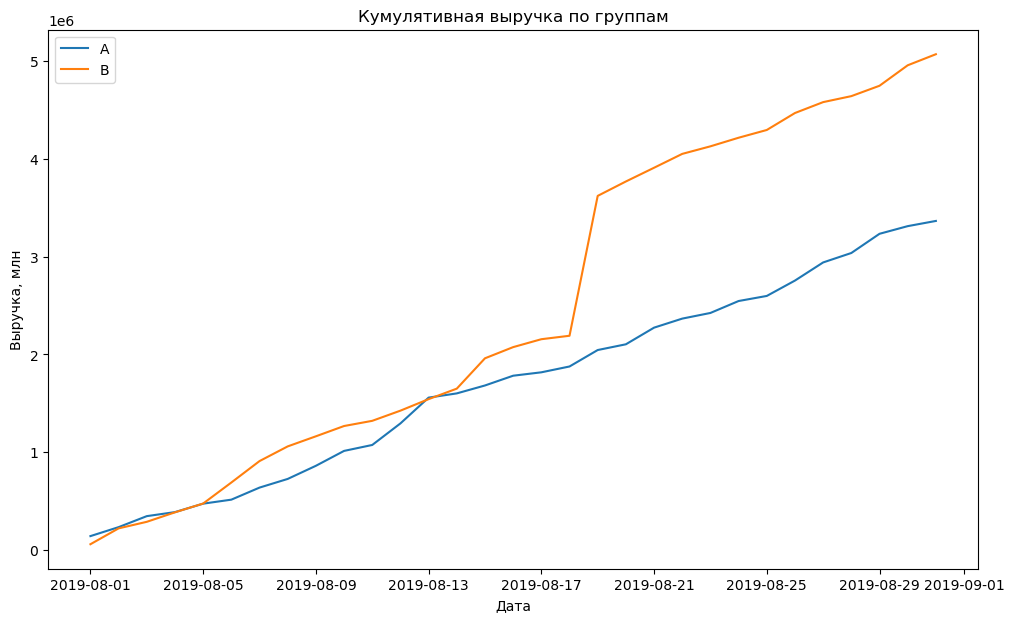

In [71]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenueA = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenueB = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12,7))

# график выручки группы А
plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue'], label='A')

# график выручки группы B
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue'], label='B')


plt.legend()
plt.xlabel('Дата')
plt.ylabel('Выручка, млн')
plt.title('Кумулятивная выручка по группам');

На графике видно, что выручка группы *A* почти равномерно увеличивается в течение всего теста. У группы *B*, напротив, есть резкий скачок в середине месяца, это может означать всплески числа заказов, либо наличие очень дорогих заказов в выборке. Нужно проанализировать выбросы.

##### График кумулятивного среднего чека по группам

Построим график кумулятивного среднего чека по группам на основе уже имеющихся датафреймов `cumulative_revenueA` и `cumulative_revenueB`.

Для этого разделим выручку на количество заказов в каждой группе:

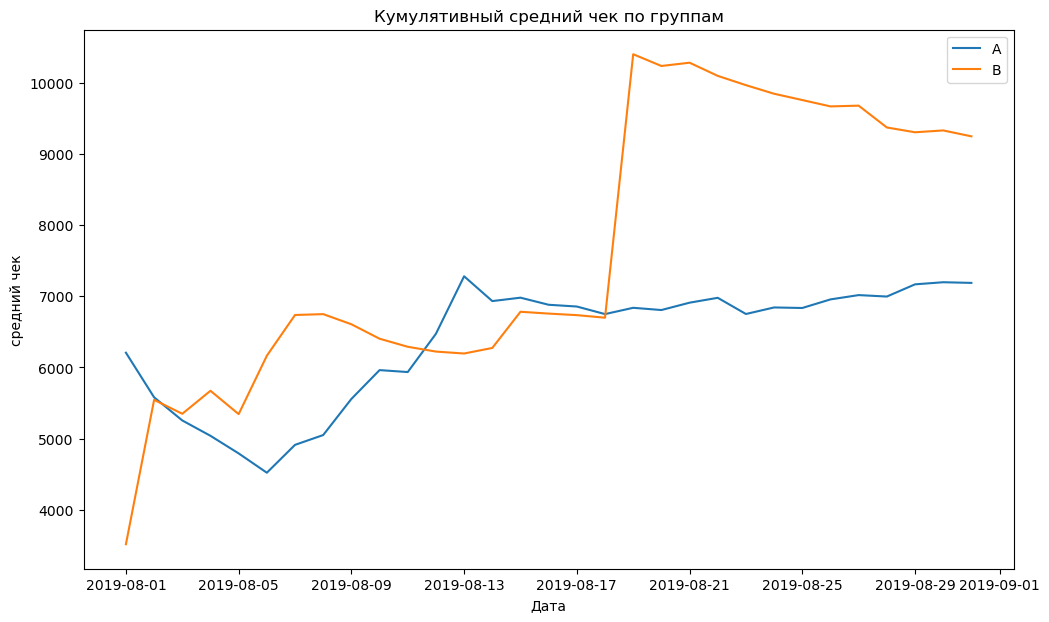

In [75]:
plt.figure(figsize=(12,7))

# график выручки группы А
plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue']/cumulative_revenueA['orders'], label='A')

# график выручки группы B
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue']/cumulative_revenueB['orders'], label='B')


plt.legend()
plt.xlabel('Дата')
plt.ylabel('средний чек')
plt.title('Кумулятивный средний чек по группам');

Графики средних чеков обеих групп имеют резкие пики, но если график группы *A* становится более равномерным под конец теста, то у группы *B* есть очень сильный скачок в том же месте, что и в графике кумулятивной выручки. Значит, в выборке всё-таки существуют очень дорогие заказы в середине рассматриваемого периода.

##### График относительного изменения кумулятивного среднего чека группы B к группе A

Построим график относительного различия среднего чека группы B к группе A:

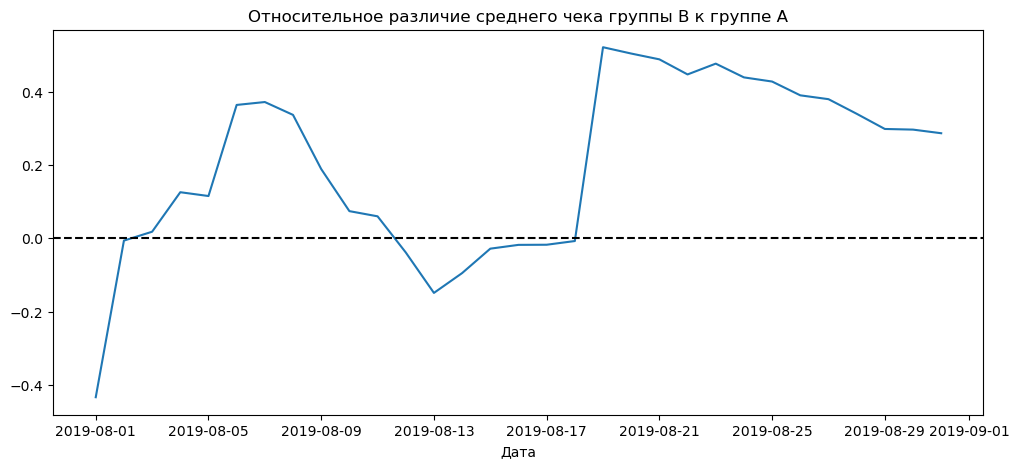

In [79]:
plt.figure(figsize=(12,5))

# собираем данные в одном датафрейме, добавляем к наименованиям столбцов "A" и "B"
merged_cumulative_revenue = cumulative_revenueA.merge(cumulative_revenueB, on='date', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(
    merged_cumulative_revenue['date'],
    (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])
    /(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)

# добавляем ось X в точке y = 0
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('Дата')
plt.title('Относительное различие среднего чека группы B к группе A');

Таким образом видно, что средний чек группы B "уступал" среднему чеку группы A только в начале теста и небольшой период в его середине, под конец теста средний чек группы B значительно превосходит средний чек группы A (больше на 30%), но на эти данные так же продолжают влиять выбросы.

##### График кумулятивного среднего количества заказов на посетителя по группам

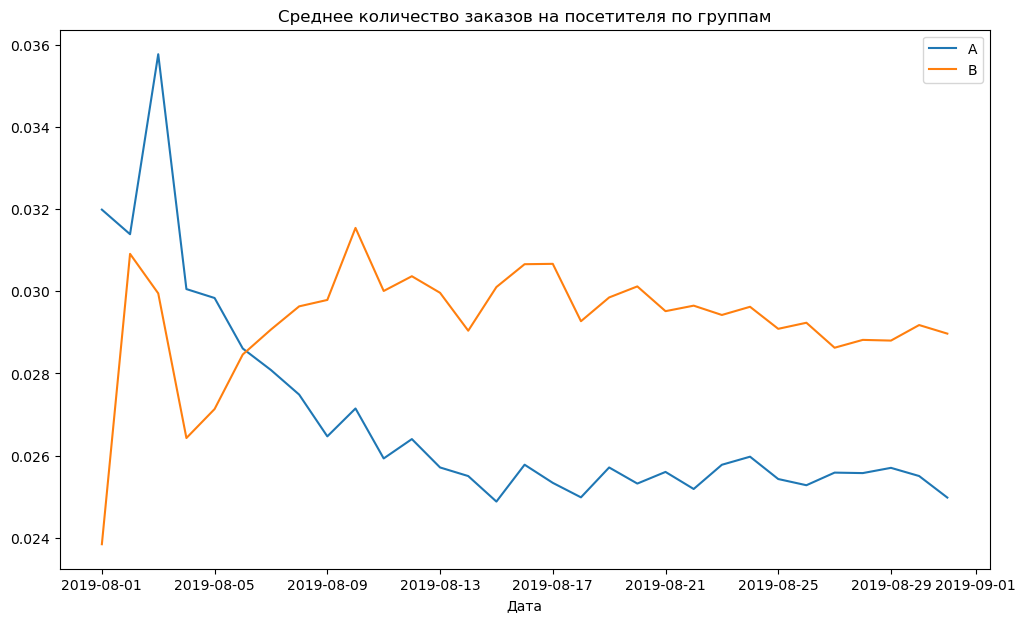

In [82]:
plt.figure(figsize=(12,7))

# считаем среднее количество заказов на посетителя
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# строим графики
plt.plot(
    cumulative_data[cumulative_data['group']=='A']['date'], 
    cumulative_data[cumulative_data['group']=='A']['conversion'], label='A'
)
plt.plot(
    cumulative_data[cumulative_data['group']=='B']['date'], 
    cumulative_data[cumulative_data['group']=='B']['conversion'], label='B'
)
plt.legend()
plt.xlabel('Дата')
plt.title('Среднее количество заказов на посетителя по группам');

Графики выглядят почти симметрично, с большими пиками в начале рассматриваемого периода, однако позже начали чуть более стабилизироваться. По итогу периода теста среднее количество заказов на посетителя у группы *B* более высокое, чем у группы *A*, но опять же мешают выбросы.

##### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

Построим график изменения кумулятивного среднего количества заказов на посетителя группы B к группе A:

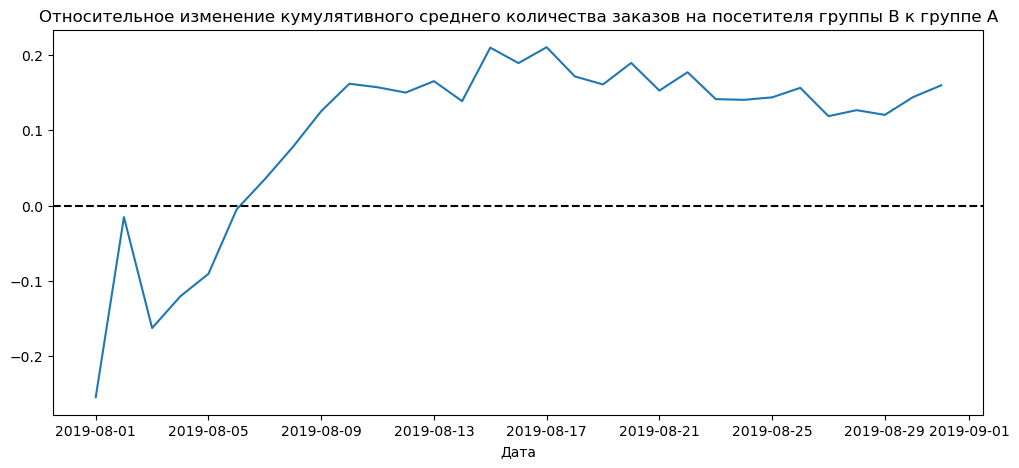

In [86]:
plt.figure(figsize=(12,5))

# собираем данные с рассчитанным средним количеством заказов на посетителя в одном датафрейме, 
# добавляем к наименованиям столбцов "A" и "B"
merged_cumulative_conversions = (
    cumulative_data[cumulative_data['group']=='A'][['date','conversion']]
    .merge(cumulative_data[cumulative_data['group']=='B'][['date','conversion']], on='date', suffixes=['A', 'B'])
)

plt.plot(
    merged_cumulative_conversions['date'], 
    merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1
)

plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A');

По графику видно, что среднее количество заказов на посетителя группы B выигрывает среднему количеству заказов на посетителя группы A. При этом в начале теста наблюдалась обратная ситуация. В данный момент показатель растёт, однако всё-равно следует проверить данные на выбросы.

Попробуем избавиться от аномалий для более корректного анализа результата A/B теста.

#### Работа с аномальными значениями по количеству заказов

In [90]:
# создаём датафрейм с группировкой по пользователям и количеством уникальных транзакций для каждого из них:

orders_group = orders.groupby('visitor_id').agg({'transaction_id':'nunique'}).reset_index()
orders_group.columns = ['user_id', 'orders']

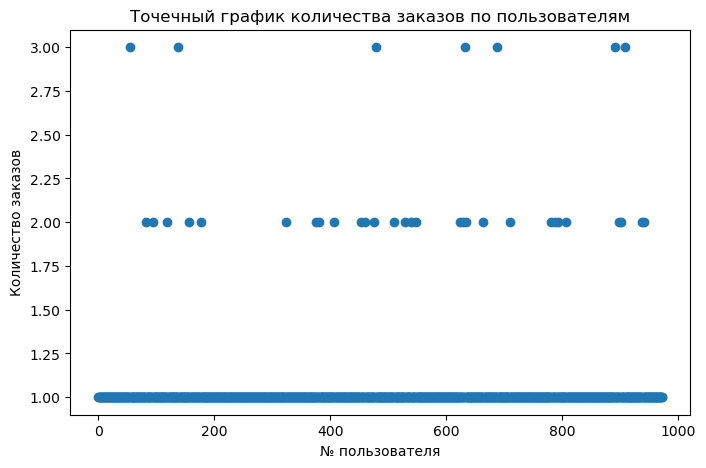

In [91]:
# задаём ось x от 0 до длины датафрейма orders_group
x_values = pd.Series(range(0,len(orders_group)))

# строим точечный график
plt.figure(figsize=(8,5))
plt.scatter(x_values, orders_group['orders'])

plt.xlabel('№ пользователя')
plt.ylabel('Количество заказов')
plt.title('Точечный график количества заказов по пользователям');

Наиболее часто пользователи делали 1 заказ за рассматриваемый период, реже - 2 и 3 заказа. Чтобы понять, какие значения считать аномальными (принято отсеивать от 1% до 5% наблюдений с крайними значениями) посчитаем 95-ый и 99-ый процентили количества заказов на одного пользователя и выберем границу для определения аномальных значений:

In [93]:
np.percentile(orders_group['orders'], [95, 99]) 

array([1., 2.])

Не более 5% пользователей оформляли больше чем 1 заказ. И 1% пользователей оформлял заказы более 2 раз. 
Считаем оптимальным выбрать границу в 2 заказа, так мы отнесем 1% пользователей к аномальным значениям. 

После определения границы аномальных значений по стоимости заказа создадим отдельный датафрейм с пользователями-выбросами, запишем выбранную границу в переменную `order_limit`.

In [95]:
order_limit = np.percentile(orders_group['orders'], 99) 

#### Работа с аномальными значениями по стоимости заказов

Оценим стоимость заказов на точечном графике:

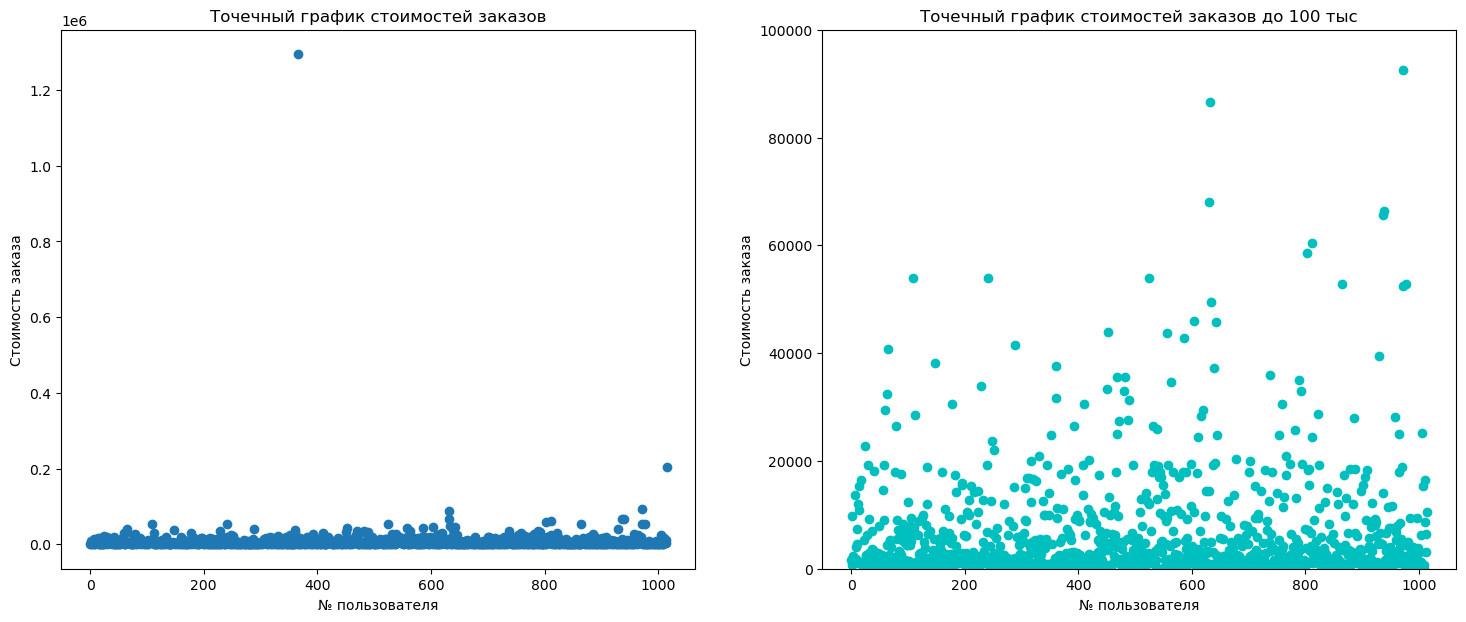

In [98]:
# задаём ось x от 0 до длины датафрейма orders
x_values = pd.Series(range(0,len(orders)))

# строим точечный график:

plt.figure(figsize=[18, 7])
plt.subplot(1, 2, 1)
plt.scatter(x_values, orders['revenue'])

plt.xlabel('№ пользователя')
plt.ylabel('Стоимость заказа')
plt.title('Точечный график стоимостей заказов')

# строим точечный график с приближенным масштабированием по оси y:

plt.subplot(1, 2, 2)
plt.scatter(x_values, orders['revenue'], color='c')

plt.xlabel('№ пользователя')
plt.ylabel('Стоимость заказа')
plt.title('Точечный график стоимостей заказов до 100 тыс')
plt.ylim(0,100000)

plt.show()

На первом графике видно, что выделяется очень сильный выброс, заказ со стоимостью значительно превышающей остальные, скорее всего он и влияет на пиковые значения на графиках кумулятивной выручки и среднего чека. На втором графике изменили масштабирование, чтобы посмотреть более детально на другие заказы.

Аналогично количеству заказов определим границу аномальных значений для стоимости заказов с помощью расчёта 95-ого и 99-ого перцентилей:

In [101]:
np.percentile(orders['revenue'], [95, 99]) 

array([26785., 53904.])

Не более 5% заказов дороже 26785 и не более 1% заказов дороже 53904. Возьмём границу для отнесения стоимости заказов к аномальным в 99-й процентиль.

Для дальнейшего анализа будем объединять аномальных пользователей по двум выбранным параметрам: примем за аномальных пользователей тех, кто совершил более 2 заказов или совершил заказ дороже 53 904. Так мы уберём 1% пользователей с наибольшим числом заказов и 1% пользователей с наиболее дорогими заказами.

Запишем выбранную границу в переменную `revenue_limit`:

In [103]:
revenue_limit = np.percentile(orders['revenue'], 99) 

Сделаем срезы пользователей с числом заказов больше 2 — `users_many_orders` и пользователей, совершивших заказы дороже 53 904 — `users_expensive_orders`. Объединим их в таблице `abnormal_users`. 

In [105]:
users_many_orders = orders_group.query('orders>@order_limit')['user_id']

users_expensive_orders = orders.query('revenue>@revenue_limit')['visitor_id']

abnormal_users = pd.concat([users_many_orders, users_expensive_orders], axis=0).drop_duplicates()

# количество аномальных пользователей
abnormal_users.count()

16

Всего 16 аномальных пользователей. Датафрейм понадобится для дальнейших расчётов статистической значимости по очищенным данным.

#### Расчёт статистической значимости различий между группами

##### Расчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы:
- H0: *различий в среднем количестве заказов между группами нет*
- H1: *различия в среднем количестве заказов между группами есть*

In [114]:
# создадим переменные для каждой из групп теста, в которых укажем id пользователей и число совершённых ими заказов:

orders_A = (
    orders.query('group == "A"')
    .groupby('visitor_id')
    .agg({'transaction_id':'nunique'})
    .reset_index()
)
orders_A.columns = ['user_id', 'orders']

orders_B = (
    orders.query('group == "B"')
    .groupby('visitor_id')
    .agg({'transaction_id':'nunique'})
    .reset_index()
)
orders_B.columns = ['user_id', 'orders']

Для подготовки выборки к проверке критерием Манна-Уитни объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал (просто посетители), будут соответствовать нули.

In [116]:
sampleA = pd.concat(
    [orders_A['orders'],
         pd.Series(0,
            index=np.arange(visitors.query('group=="A"')['visitors'].sum() - len(orders_A['orders'])),
            name='orders',
        ),],
    axis=0,
)

sampleB = pd.concat(
    [orders_B['orders'],
        pd.Series(0,
            index=np.arange(visitors.query('group=="B"')['visitors'].sum() - len(orders_B['orders'])),
            name='orders',
        ),],
    axis=0,
)

Ниже проведём непараметрический тест Уилкоксона-Манна-Уитни:

In [118]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(sampleA, sampleB)

print('p-значение: ', "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )
    
print("\n{0:.3f}".format((sampleB.mean() / sampleA.mean() - 1)*100),'%')

p-значение:  0.011
Отвергаем нулевую гипотезу: разница статистически значима

15.980 %


**Вывод**: По «сырым» данным существуют различия в среднем количестве заказов на посетителя между группами. 
p-value меньше 0.05, что значит, нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов на посетителя между группами нет, отвергаем.

При этом среднее количество заказов группы B выигрывает на 15,98%.

##### Расчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Проверим статистическую значимость различий в среднем чеке между группами.

Сформулируем гипотезы:
- H0: *различий в среднем чеке между группами нет*
- H1: *различия в среднем чеке между группами есть*

Чтобы рассчитать статистическую значимость различий в среднем чеке, проведём непараметрический тест Манна-Уитни, используя данные о выручке с заказов, а также найдём относительные различия в среднем чеке между группами:

In [123]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(
    orders.query('group=="A"')['revenue'], 
    orders.query('group=="B"')['revenue']
)

print('p-значение: ', "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )
    
print("\n{0:.3f}".format(
    (orders.query('group=="B"')['revenue'].mean() / orders.query('group=="A"')['revenue'].mean() - 1)*100
    ),'%')

p-значение:  0.829
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя

28.660 %


**Вывод**: По «сырым» данным различий в среднем чеке заказа у групп A и B нет. 
p-value больше 0.05, что значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказа между группами нет, не отвергаем.

При этом средний чек группы B значительно больше среднего чека группы A - на 28,66%. Значит, наблюдаемые различия не являются значимыми при таком уровне значимости, а следовательно были получены случайно.

##### Расчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «очищенным» данным — после удаления аномальных пользователей.

Для этого отфильтруем переменные `sampleA` и `sampleB`.

In [128]:
sampleA_filtered = pd.concat(
    [orders_A[
        np.logical_not(orders_A['user_id'].isin(abnormal_users))
    ]['orders'],
         pd.Series(0,
            index=np.arange(visitors.query('group=="A"')['visitors'].sum() - len(orders_A['orders'])),
            name='orders',
        ),],
    axis=0,
)

sampleB_filtered = pd.concat(
    [orders_B[
        np.logical_not(orders_B['user_id'].isin(abnormal_users))
    ]['orders'],
        pd.Series(0,
            index=np.arange(visitors.query('group=="B"')['visitors'].sum() - len(orders_B['orders'])),
            name='orders',
        ),],
    axis=0,
)

Ниже проведём непараметрический тест Уилкоксона-Манна-Уитни по очищенным данным:

In [130]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(sampleA_filtered, sampleB_filtered)

print('p-значение: ', "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )
    
print("\n{0:.3f}".format((sampleB_filtered.mean() / sampleA_filtered.mean() - 1)*100),'%')

p-значение:  0.007
Отвергаем нулевую гипотезу: разница статистически значима

18.921 %


**Вывод**: По «очищенным» данным различие в среднем количестве заказов на посетителя между группами так же есть.
p-value меньше 0.05, что значит, что нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов на посетителя между группами нет, отвергаем.

Однако теперь среднее количество заказов группы B выигрывает у группы A на 18,92%. На это повлияло исключение пользователей с количеством заказов > 2, судя по всему многие из таких пользователей относились к группе A.

##### Расчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным — после удаления аномальных пользователей.

In [134]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(
    orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'], 
    orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue']
)

print('p-значение: ', "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )
    
print("\n{0:.3f}".format(
    (orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'].mean() / 
     orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'].mean() - 1)*100
    ),'%')

p-значение:  0.788
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя

-3.234 %


**Вывод**: По «очищенным» данным различий в среднем чеке заказа у групп A и B так же нет. 
p-value больше 0.05, что значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказа между группами нет, не отвергаем.

При этом средний чек группы B стал немного ниже среднего чека группы A, на 3,2%. Значит, скорее всего, большее влияние на средний чек имели выбросы с высокой стоимостью заказа пользователей группы B.

Итого, хотя общие выводы по результатам теста не изменились, видно, что аномалии сильно влияют на результаты A/B-теста.

## Вывод

**Таким образом, подведём общие выводы по проведению A/B теста:**

1. Существует статистически значимое различие по среднему количеству заказов между группами как по «сырым» данным, так и по данным после фильтрации аномалий.
2. Нет статистически значимого различия по среднему чеку между группами ни по "сырым", ни по "очищенным" данным.
3. График различия среднего количества заказов между группами говорит о том, что среднее количество заказов группы *B* явно выигрывает у группы *A*.
4. График различия среднего чека малоинформативен, так как на него сильно влияют выбросы, однако после фильтрации данных средний чек группы B чуть ниже среднего чека группы A на 3,2%.

При учёте того, что изначально деление трафика по группам было с ошибками - 58 пользователей относились к обоим группам, следует учитывать, что деление трафика могло быть проведено некорректно. Однако по полученным данным можно говорить о том, что достигнуто статистически значимое различие по одной из двух рассматриваемых метрик - среднее количество заказов на посетителя группы *B* значительно выше среднего количества заказов на посетителя группы *A*.

При этом значение статистической значимости различий в среднем чеке заказа между группами вряд ли изменится, так как *p-значение* слишком высокое, поэтому продолжать тест нет смысла.

Предлагается завершить тест и признать победу группы *B*, так как при увеличении среднего количества заказа на пользователя ожидается увеличение выручки магазина. Также можно было провести дополнительные тесты по другим метрикам для закрепления результата.

**В результате исследования были выполнены следующие этапы работы:**

- выполнена предобработка данных, а именно установлен корректный тип данных, регистр названий столбцов, проведена проверка на явные дубликаты и пропуски;
- проведена приоритизация гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence и Effort с помощью фреймворков ICE и RICE;
- по результатам A/B теста рассчитаны агрегированные кумулятивные данные о заказах и о посетителях интернет-магазина, на основе расчётов построены кумулятивные графики;
- проведена работа по установлению границ аномальных значений для стоимости заказа и количества заказов пользователя;
- проведены расчёты статистической значимости по двум метрикам: различия по среднему количеству заказов и различия по среднему чеку между группами, как по "сырым", так и по "очищенным" данным.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Содержательный вывод по проделанной работе!)

<div style="background-color:lavender; color:#black; text-align:center; padding:2%">
    
**Комментарий студента:** Эльвира, подскажи, пожалуйста, правильно ли я сделала вывод, признав удачным проведение A/B тестирования и признав группу B выигрышной? Или здесь могут быть и другие выводы, которые так же нельзя назвать неверными?
    
То есть, если бы я приняла другое решение по итогам результатов теста, было бы это ошибкой?

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊 v_2 <a class="tocSkip"> </h2>

Верно, так как мы получили разницу по кол-ву заказов на пользователя, а ждать увеличения среднего чека не имеет смысла. Выручка это кол-во заказов умноженное на средний чек, так что она в любом случае увеличится, дае при том же среднем чеке, при увеличении заказов)

<div style="border:solid Purple 2px; padding: 40px">

<h2> Общий комментарий ревьюера 😊 v_2<a class="tocSkip"> </h2>
    <br/>
Кристина, спасибо за проект! Успехов в дальнейшем обучении!)
   

<div style="border:solid Purple 2px; padding: 40px">

<h2> Общий комментарий ревьюера 😊<a class="tocSkip"> </h2>
    <br/>
Кристина , замечательная работа по проекту, отлично справилась с расчетами и графиками)
    
Необходимо доработать:
    
* Указать гипотезы
* Остальные комментарии ты найдешь в работе
    
 
**Желаю удачи и жду твой проект на повторное ревью! Если вдруг у тебя возникнут вопросы, то я с радостью отвечу на них.    😊**
    
<br>   
             
**Дополнительные материалы:**
 
[Вебинары под эгидой Практикума](https://vk.com/yandex.praktikum?w=wall-176471180_2144), 
    
[Лекции Анатолия Карпова 1](https://www.youtube.com/watch?v=jnFVmtaeSA0&list=WL&index=19&t=2s) [2](https://www.youtube.com/watch?v=gljfGAkgX_o&list=WL&index=4)
    
Материалы [gopractice](https://gopractice.ru/summary/)

Лекцию Карта статистических методов [Смотреть видео](https://www.youtube.com/watch?v=-zps6hm0nX8&t=1269s)
        
</div>